# Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have hired you as an consultant. You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## 1. Let's understand the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boom_bikes.shape

(730, 16)

In [4]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There are no missing values present in the dataset.
Lets start with analysis of numerical variables

## 2. Data visualization

In [6]:
boom_bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### visualizing numeric variables

<Figure size 1440x576 with 0 Axes>

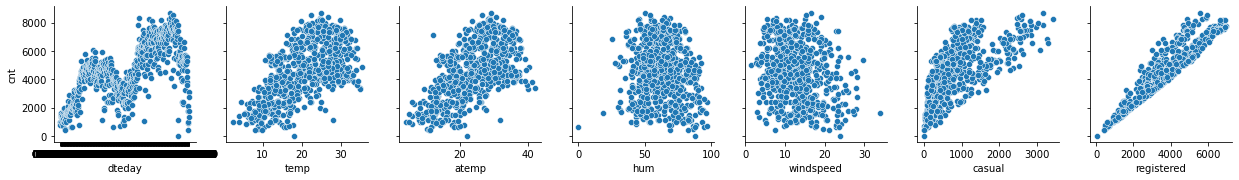

In [7]:
plt.figure(figsize=(20,8))
sns.pairplot(data=boom_bikes, y_vars='cnt', x_vars=['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'])
plt.show()

Looks like there is some relation between cnt and variables temp, atemp, casual and registered.

#### visualizing categorical variables

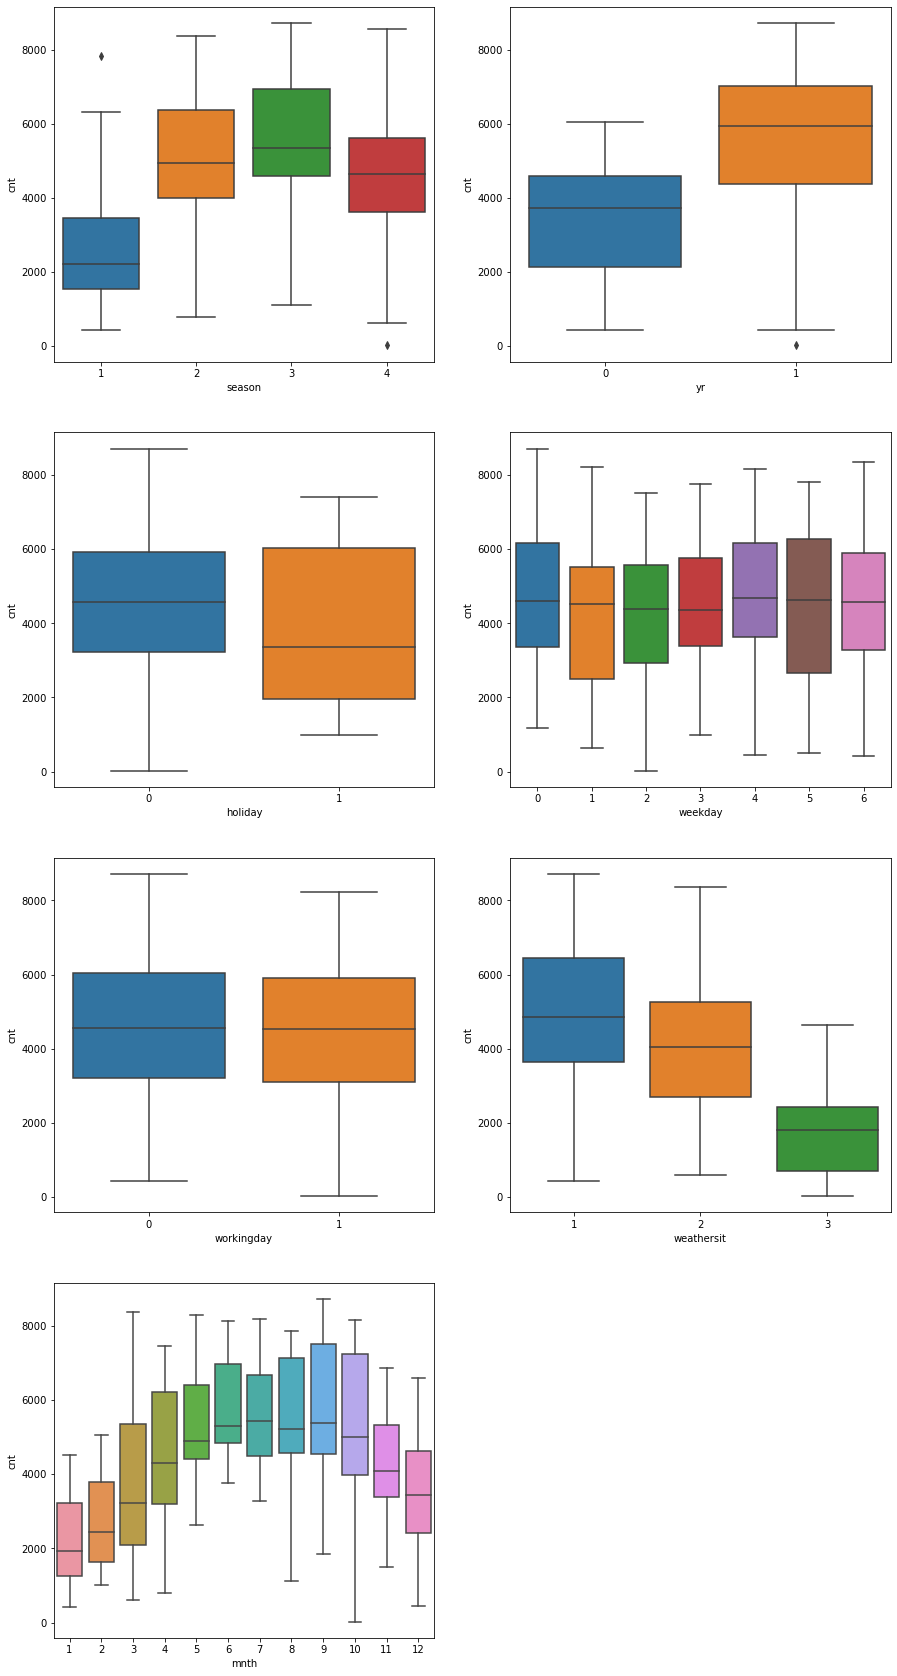

In [8]:
plt.figure(figsize=(15,30))

plt.subplot(4,2,1)
sns.boxplot(data=boom_bikes, y='cnt', x='season')

plt.subplot(4,2,2)
sns.boxplot(data=boom_bikes, y='cnt', x='yr')

plt.subplot(4,2,3)
sns.boxplot(data=boom_bikes, y='cnt', x='holiday')

plt.subplot(4,2,4)
sns.boxplot(data=boom_bikes, y='cnt', x='weekday')

plt.subplot(4,2,5)
sns.boxplot(data=boom_bikes, y='cnt', x='workingday')

plt.subplot(4,2,6)
sns.boxplot(data=boom_bikes, y='cnt', x='weathersit')

plt.subplot(4,2,7)
sns.boxplot(data=boom_bikes, y='cnt', x='mnth')

plt.show()

Apart from working day and weekday, the median of other variables show some relationship with cnt.

#### Checking if working day can be dropped

In [9]:
boom_bikes[boom_bikes['workingday']==1]['holiday'].value_counts()  ## working day

0    504
Name: holiday, dtype: int64

In [10]:
boom_bikes[boom_bikes['workingday']==0]['holiday'].value_counts()   ##either weekend or holiday

0    205
1     21
Name: holiday, dtype: int64

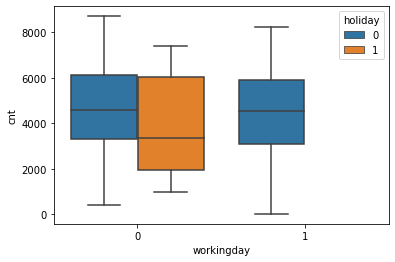

In [11]:
sns.boxplot(data=boom_bikes, y='cnt', x='workingday', hue='holiday')
plt.show()

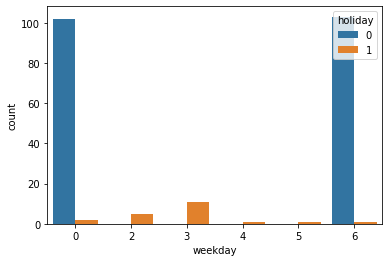

In [12]:
sns.countplot(data=boom_bikes[boom_bikes['workingday']==0], x='weekday', hue='holiday')
plt.show()

Above graph is for a non-working day (working day = 0). Can see that fewer number of sundays and saturdays were marked as holidays. If its not a working day and if its not a holiday then it means those are weekends. We can drop the holiday=1 rows if they are very less significant in number

In [13]:
boom_bikes[(boom_bikes['workingday']==0) & (boom_bikes['holiday']==0)].weekday.value_counts()

6    103
0    102
Name: weekday, dtype: int64

When it was not a holiday and also people were not working, are all weekends given by weekday column.

In [14]:
boom_bikes[(boom_bikes['workingday']==1) & (boom_bikes['holiday']==1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There are no records where holiday was a working day

In [15]:
boom_bikes[(boom_bikes['workingday']==0) & (boom_bikes['holiday']==1)].value_counts().sum()

21

In [16]:
boom_bikes[(boom_bikes['workingday']==1) & (boom_bikes['holiday']==0)].value_counts().sum()

504

#### We can drop the column 'workingday' as the information it provides is redundant.
#### Also we will drop instant and dteday column as it is as good as index variable

In [17]:
boom_bikes.drop(['workingday','dteday','instant'],inplace=True, axis=1)

In [18]:
boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Preparation

We can skip this method and use prefix attribute from get_dummies method instead 

In [19]:
varlist = ['season']

boom_bikes[varlist] = boom_bikes[varlist].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

boom_bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
varlist = ['mnth']

boom_bikes[varlist] = boom_bikes[varlist].apply(lambda x: x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may',
                                                                6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',
                                                                11:'nov',12:'dec'}))

boom_bikes['mnth'].value_counts()

may    62
jan    62
mar    62
aug    62
oct    62
dec    62
jul    62
nov    60
apr    60
jun    60
sep    60
feb    56
Name: mnth, dtype: int64

In [21]:
varlist = ['weekday']

boom_bikes[varlist] = boom_bikes[varlist].apply(lambda x: x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}))

boom_bikes['weekday'].value_counts()

Tue    105
Mon    105
Thu    104
Sat    104
Fri    104
Sun    104
Wed    104
Name: weekday, dtype: int64

In [22]:
varlist = ['weathersit']

boom_bikes[varlist] = boom_bikes[varlist].apply(lambda x: x.map({1:'WCAT1',2:'WCAT2',3:'WCAT3',4:'WCAT4'}))

boom_bikes['weathersit'].value_counts()

WCAT1    463
WCAT2    246
WCAT3     21
Name: weathersit, dtype: int64

In [23]:
#rounding off the temperatures to nearest integer
varlist = ['temp','atemp']

boom_bikes[varlist] = boom_bikes[varlist].apply(lambda x: round(x))

boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,Mon,WCAT2,14.0,18.0,80.5833,10.749882,331,654,985
1,spring,0,jan,0,Tue,WCAT2,15.0,18.0,69.6087,16.652113,131,670,801
2,spring,0,jan,0,Wed,WCAT1,8.0,9.0,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,Thu,WCAT1,8.0,11.0,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,Fri,WCAT1,9.0,11.0,43.6957,12.522300,82,1518,1600


In [24]:
#rounding off the speed and humidity to two decimals
varlist = ['hum','windspeed']

boom_bikes[varlist] = boom_bikes[varlist].apply(lambda x: round(x,2))

boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,Mon,WCAT2,14.0,18.0,80.58,10.75,331,654,985
1,spring,0,jan,0,Tue,WCAT2,15.0,18.0,69.61,16.65,131,670,801
2,spring,0,jan,0,Wed,WCAT1,8.0,9.0,43.73,16.64,120,1229,1349
3,spring,0,jan,0,Thu,WCAT1,8.0,11.0,59.04,10.74,108,1454,1562
4,spring,0,jan,0,Fri,WCAT1,9.0,11.0,43.70,12.52,82,1518,1600


### We would use encoders to create dummy variables for the nominal values in the data

In [25]:
seasons = pd.get_dummies(boom_bikes['season'], drop_first=True)

seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Dropped the fall column as 000 means fall
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [26]:
boom_bikes = pd.concat([boom_bikes, seasons], axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,jan,0,Mon,WCAT2,14.0,18.0,80.58,10.75,331,654,985,1,0,0
1,spring,0,jan,0,Tue,WCAT2,15.0,18.0,69.61,16.65,131,670,801,1,0,0
2,spring,0,jan,0,Wed,WCAT1,8.0,9.0,43.73,16.64,120,1229,1349,1,0,0
3,spring,0,jan,0,Thu,WCAT1,8.0,11.0,59.04,10.74,108,1454,1562,1,0,0
4,spring,0,jan,0,Fri,WCAT1,9.0,11.0,43.70,12.52,82,1518,1600,1,0,0


In [27]:
months = pd.get_dummies(boom_bikes['mnth'], drop_first=True)

months.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


all 0s is apr

In [28]:
boom_bikes = pd.concat([boom_bikes, months], axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,Mon,WCAT2,14.0,18.0,80.58,10.75,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,Tue,WCAT2,15.0,18.0,69.61,16.65,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,Wed,WCAT1,8.0,9.0,43.73,16.64,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,Thu,WCAT1,8.0,11.0,59.04,10.74,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,Fri,WCAT1,9.0,11.0,43.70,12.52,...,0,0,1,0,0,0,0,0,0,0


In [29]:
weekday = pd.get_dummies(boom_bikes['weekday'], drop_first=True)

weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [30]:
boom_bikes = pd.concat([boom_bikes, weekday], axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,...,may,nov,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,jan,0,Mon,WCAT2,14.0,18.0,80.58,10.75,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,Tue,WCAT2,15.0,18.0,69.61,16.65,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,Wed,WCAT1,8.0,9.0,43.73,16.64,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,Thu,WCAT1,8.0,11.0,59.04,10.74,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,Fri,WCAT1,9.0,11.0,43.70,12.52,...,0,0,0,0,0,0,0,0,0,0


In [31]:
weathersit = pd.get_dummies(boom_bikes['weathersit'], drop_first=True)

weathersit.head()

,WCAT2,WCAT3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


since we did not have any value with WCAT4, 00 means WCAT1

In [32]:
boom_bikes = pd.concat([boom_bikes, weathersit], axis=1)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,WCAT2,WCAT3
0,spring,0,jan,0,Mon,WCAT2,14.0,18.0,80.58,10.75,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,jan,0,Tue,WCAT2,15.0,18.0,69.61,16.65,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,jan,0,Wed,WCAT1,8.0,9.0,43.73,16.64,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Thu,WCAT1,8.0,11.0,59.04,10.74,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,Fri,WCAT1,9.0,11.0,43.70,12.52,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#dropping all originals columns corresponding to dummies.
boom_bikes.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
boom_bikes.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,WCAT2,WCAT3
0,0,0,14.0,18.0,80.58,10.75,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,15.0,18.0,69.61,16.65,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,8.0,9.0,43.73,16.64,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,8.0,11.0,59.04,10.74,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,9.0,11.0,43.70,12.52,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


## Let's split our data into train and test blocks with ratio of 70:30 respectively

In [34]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [35]:
np.random.seed(0)
df_train, df_test = train_test_split(boom_bikes, train_size=0.7, test_size=0.3, random_state=100)

In [36]:
df_train.shape

(510, 31)

In [37]:
df_test.shape

(219, 31)

#### Scaling of categorical variables

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'WCAT2', 'WCAT3'],
      dtype='object')

In [41]:
num_vars= ['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

In [42]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,WCAT2,WCAT3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.548723,0.513725,0.650378,0.320866,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.226302,0.213081,0.145885,0.169770,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.363636,0.342105,0.538644,0.199230,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.545455,0.526316,0.653751,0.296760,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.757576,0.684211,0.754818,0.414501,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,WCAT2,WCAT3
653,1,0,0.515152,0.500000,0.575330,0.300930,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,0.818182,0.763158,0.725680,0.264678,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.454545,0.447368,0.640148,0.255374,0.290765,0.446145,0.465255,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0.242424,0.210526,0.498042,0.663138,0.110332,0.203869,0.204096,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.393939,0.394737,0.504534,0.188643,0.340750,0.444701,0.482973,0,...,0,0,0,0,1,0,0,0,1,0


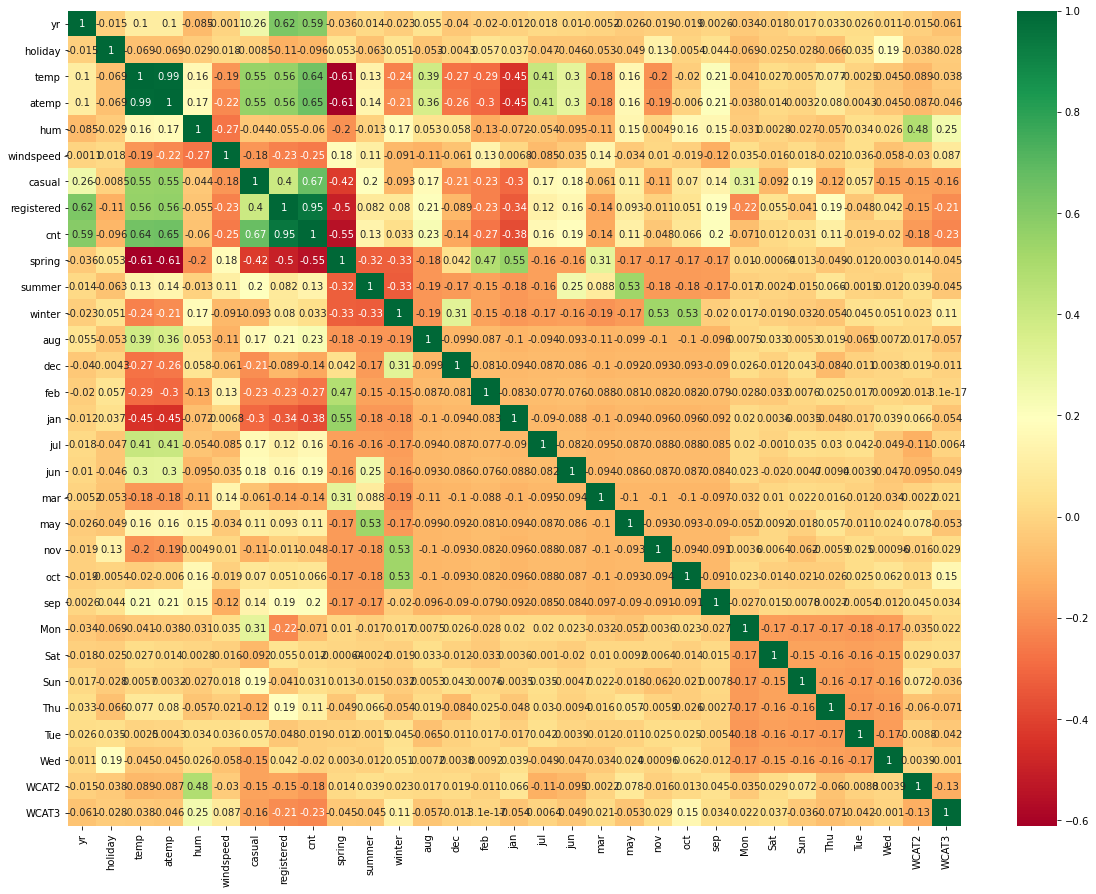

In [45]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### We can see a high correlation between registered and cnt variable. so lets plot it and check if there is a linear relation. It looks like there is.

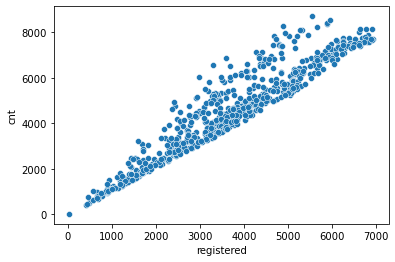

In [46]:
sns.scatterplot(data=boom_bikes, x='registered', y='cnt')
plt.show()

Lets start by building model with registered.

## Model building using manual forward approach

#### Dividing train into X and y

In [47]:
y_train = df_train['cnt']
X_train = df_train['registered']

In [48]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [49]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_1 = lr.fit()

lr_1.params

const         0.024532
registered    0.933473
dtype: float64

In [50]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.75e-255
Time:                        15:29:58   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.0

#### 0.89 seems a pretty good r2 value, also F probablistic value is very low. Lets next highly correlated variable and check for r2 value. spring has a very high negative correlation with cnt. lets add it and check

In [51]:
X_train = df_train[['registered','spring']]

In [52]:
X_train_sm = sm.add_constant(X_train)

X_train_sm.head()

,const,registered,spring
653,1.0,0.951776,0
576,1.0,0.899220,0
426,1.0,0.446145,1
728,1.0,0.203869,1
482,1.0,0.444701,0


In [53]:
lr = sm.OLS(y_train, X_train_sm)

lr_2 = lr.fit()

lr_2.params

const         0.063295
registered    0.883961
spring       -0.052735
dtype: float64

In [54]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2473.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.03e-262
Time:                        15:29:58   Log-Likelihood:                 644.24
No. Observations:                 510   AIC:                            -1282.
Df Residuals:                     507   BIC:                            -1270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0633      0.010      6.525      0.0

The R2 value has increased to 0.907. Lets add another correlated variable, now casual

In [55]:
X_train_sm = sm.add_constant(df_train[['registered','spring','casual']])
X_train_sm.head()

,const,registered,spring,casual
653,1.0,0.951776,0,0.280402
576,1.0,0.899220,0,0.294422
426,1.0,0.446145,1,0.290765
728,1.0,0.203869,1,0.110332
482,1.0,0.444701,0,0.340750


In [56]:
lr = sm.OLS(y_train, X_train_sm)

lr_3 = lr.fit()



In [57]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.915e+32
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:58   Log-Likelihood:                 17686.
No. Observations:                 510   AIC:                        -3.536e+04
Df Residuals:                     506   BIC:                        -3.535e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.296e-16   3.11e-17     10.592      0.0

#### We have achieved perfect value of R2 as 1 and Prob(F-statistic) is also 0. P values are also zero for all the independent variables used in model.

Lets add next correlated variable atemp and look what happens.

In [58]:
X_train_sm = sm.add_constant(df_train[['registered','spring','casual','atemp']])
X_train_sm.head()

,const,registered,spring,casual,atemp
653,1.0,0.951776,0,0.280402,0.500000
576,1.0,0.899220,0,0.294422,0.763158
426,1.0,0.446145,1,0.290765,0.447368
728,1.0,0.203869,1,0.110332,0.210526
482,1.0,0.444701,0,0.340750,0.394737


In [59]:
lr = sm.OLS(y_train, X_train_sm)

lr_4 = lr.fit()

In [60]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.595e+32
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:58   Log-Likelihood:                 17713.
No. Observations:                 510   AIC:                        -3.542e+04
Df Residuals:                     505   BIC:                        -3.539e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17   3.63e-17      2.484      0.0

#### R2 value remains unchanged and Adj. R2 also is unchanged, Prob F statistic is also 0, p value however for spring has changed to 1. means that there is some correlation between atemp and spring. Lets drop atemp from our model for now and take next highly correlated variable i.e. temp

In [61]:
X_train_sm = sm.add_constant(df_train[['registered','spring','casual','temp']])
X_train_sm.head()

,const,registered,spring,casual,temp
653,1.0,0.951776,0,0.280402,0.515152
576,1.0,0.899220,0,0.294422,0.818182
426,1.0,0.446145,1,0.290765,0.454545
728,1.0,0.203869,1,0.110332,0.242424
482,1.0,0.444701,0,0.340750,0.393939


In [62]:
lr = sm.OLS(y_train, X_train_sm)

lr_5 = lr.fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.864e+32
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:58   Log-Likelihood:                 17939.
No. Observations:                 510   AIC:                        -3.587e+04
Df Residuals:                     505   BIC:                        -3.585e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-17   2.34e-17      2.970      0.0

#### R2 value remains unchanged and Adj. R2 also is unchanged, Prob F statistic is also 0, p value however for spring has changed to 0.4. means that there is some correlation between temp and spring. Lets drop temp from our model for now and take next highly correlated variable i.e. yr

In [63]:
X_train_sm = sm.add_constant(df_train[['registered','spring','casual','yr']])
X_train_sm.head()

,const,registered,spring,casual,yr
653,1.0,0.951776,0,0.280402,1
576,1.0,0.899220,0,0.294422,1
426,1.0,0.446145,1,0.290765,1
728,1.0,0.203869,1,0.110332,1
482,1.0,0.444701,0,0.340750,1


In [64]:
lr = sm.OLS(y_train, X_train_sm)

lr_6 = lr.fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.016e+33
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:58   Log-Likelihood:                 18185.
No. Observations:                 510   AIC:                        -3.636e+04
Df Residuals:                     505   BIC:                        -3.634e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.544e-16    1.3e-17     11.915      0.0

### Looks like a perfect model right now with all values in limit. r2=1, adj. r2=1, prob fstats = 0, p values 0.

### We have more independent variables but their correlation is not significant. We will for now settle for lr_6 model as our final model.


In [65]:
y_train_predict = lr_6.predict(X_train_sm)

In [66]:
res = y_train - y_train_predict

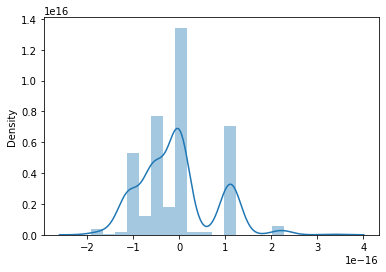

In [67]:
sns.distplot(res, bins=20)
plt.show()

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def get_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
y_train = df_train['cnt']
X_train = df_train.loc[:,df_train.columns != 'cnt']

In [72]:
lr = LinearRegression()

lr.fit(X_train, y_train)

rfe = RFE(lr, 10)   #select top 10 features

rfe = rfe.fit(X_train, y_train)

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', False, 9),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 15),
 ('windspeed', False, 2),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 3),
 ('aug', False, 13),
 ('dec', True, 1),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', False, 16),
 ('jun', False, 5),
 ('mar', False, 21),
 ('may', True, 1),
 ('nov', False, 17),
 ('oct', False, 14),
 ('sep', False, 10),
 ('Mon', False, 8),
 ('Sat', False, 12),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 20),
 ('Wed', False, 19),
 ('WCAT2', False, 18),
 ('WCAT3', False, 6)]

In [74]:
# creating list of columns for which rfe support is true. These will be features selected
final_cols = X_train.columns[rfe.support_]
final_cols

Index(['holiday', 'temp', 'atemp', 'casual', 'registered', 'spring', 'summer',
       'dec', 'jan', 'may'],
      dtype='object')

In [75]:
# drilling features for model manually using statsmodel

X_train_new = X_train[final_cols]

X_train_sm = sm.add_constant(X_train_new)

X_train_sm.head()

,const,holiday,temp,atemp,casual,registered,spring,summer,dec,jan,may
653,1.0,0,0.515152,0.500000,0.280402,0.951776,0,0,0,0,0
576,1.0,0,0.818182,0.763158,0.294422,0.899220,0,0,0,0,0
426,1.0,0,0.454545,0.447368,0.290765,0.446145,1,0,0,0,0
728,1.0,0,0.242424,0.210526,0.110332,0.203869,1,0,1,0,0
482,1.0,0,0.393939,0.394737,0.340750,0.444701,0,1,0,0,0


In [76]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.058e+29
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                 16631.
No. Observations:                 510   AIC:                        -3.324e+04
Df Residuals:                     499   BIC:                        -3.319e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.155e-15   3.57e-16      3.237      0.0

In [77]:
get_VIF(X_train_new)

     Features     VIF
2       atemp  296.58
1        temp  292.73
4  registered    8.43
3      casual    3.86
6      summer    1.91
5      spring    1.77
8         jan    1.61
9         may    1.54
7         dec    1.14
0     holiday    1.03


In [78]:
X_train_new.drop(['temp'], axis=1, inplace=True)

In [79]:
X_train_sm = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_sm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.658e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                 17345.
No. Observations:                 510   AIC:                        -3.467e+04
Df Residuals:                     500   BIC:                        -3.463e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.372e-16   8.71e-17      5.017      0.0

In [80]:
get_VIF(X_train_new)

     Features   VIF
1       atemp  9.89
3  registered  8.41
2      casual  3.86
5      summer  1.91
4      spring  1.77
7         jan  1.61
8         may  1.54
6         dec  1.13
0     holiday  1.03


In [81]:
X_train_new.drop(['atemp'], axis=1, inplace=True)

X_train_new.columns

Index(['holiday', 'casual', 'registered', 'spring', 'summer', 'dec', 'jan',
       'may'],
      dtype='object')

In [82]:
X_train_sm = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train, X_train_sm).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.137e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                 17687.
No. Observations:                 510   AIC:                        -3.536e+04
Df Residuals:                     501   BIC:                        -3.532e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.633e-17   3.43e-17     -2.225      0.0

In [83]:
get_VIF(X_train_new)

     Features   VIF
2  registered  3.53
1      casual  3.20
4      summer  1.90
3      spring  1.76
6         jan  1.61
7         may  1.53
5         dec  1.13
0     holiday  1.03


### I would like to add yr to this model to see what changes in the model

In [84]:
X_train_combined = pd.concat([X_train_new, df_train['yr']], axis=1)

X_train_combined.head()

,holiday,casual,registered,spring,summer,dec,jan,may,yr
653,0,0.280402,0.951776,0,0,0,0,0,1
576,0,0.294422,0.899220,0,0,0,0,0,1
426,0,0.290765,0.446145,1,0,0,0,0,1
728,0,0.110332,0.203869,1,0,1,0,0,1
482,0,0.340750,0.444701,0,1,0,0,0,1


In [85]:
X_train_sm = sm.add_constant(X_train_combined)

lr4 = sm.OLS(y_train, X_train_sm).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.333e+29
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                 16512.
No. Observations:                 510   AIC:                        -3.300e+04
Df Residuals:                     500   BIC:                        -3.296e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.228e-15   3.87e-16      3.174      0.0

In [86]:
get_VIF(X_train_combined)

     Features   VIF
2  registered  5.73
8          yr  3.32
1      casual  3.20
4      summer  1.90
3      spring  1.78
6         jan  1.61
7         may  1.54
5         dec  1.13
0     holiday  1.03


In [87]:
#dropping jan with high p value 

X_train_combined.drop(['jan'], axis=1, inplace=True)

X_train_combined.columns

Index(['holiday', 'casual', 'registered', 'spring', 'summer', 'dec', 'may',
       'yr'],
      dtype='object')

In [88]:
X_train_sm = sm.add_constant(X_train_combined)

lr5 = sm.OLS(y_train, X_train_sm).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.876e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                 17346.
No. Observations:                 510   AIC:                        -3.467e+04
Df Residuals:                     501   BIC:                        -3.464e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-16   7.42e-17      2.338      0.0

In [89]:
get_VIF(X_train_combined)

     Features   VIF
2  registered  5.73
7          yr  3.32
1      casual  3.18
4      summer  1.90
6         may  1.54
3      spring  1.18
5         dec  1.11
0     holiday  1.03


In [90]:
#dropping may with high p value 

X_train_combined.drop(['may'], axis=1, inplace=True)

X_train_combined.columns

Index(['holiday', 'casual', 'registered', 'spring', 'summer', 'dec', 'yr'], dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train_combined)

lr6 = sm.OLS(y_train, X_train_sm).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.879e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                 17421.
No. Observations:                 510   AIC:                        -3.483e+04
Df Residuals:                     502   BIC:                        -3.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.22e-16   6.37e-17     -3.486      0.0

In [92]:
get_VIF(X_train_combined)

     Features   VIF
2  registered  5.69
6          yr  3.29
1      casual  3.18
4      summer  1.40
3      spring  1.18
5         dec  1.11
0     holiday  1.03


In [93]:
#dropping registered with high p value 

X_train_combined.drop(['registered'], axis=1, inplace=True)

X_train_combined.columns

Index(['holiday', 'casual', 'spring', 'summer', 'dec', 'yr'], dtype='object')

In [94]:
X_train_sm = sm.add_constant(X_train_combined)

lr7 = sm.OLS(y_train, X_train_sm).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     264.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.92e-152
Time:                        15:30:00   Log-Likelihood:                 401.53
No. Observations:                 510   AIC:                            -789.1
Df Residuals:                     503   BIC:                            -759.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3625      0.011     31.760      0.0

### R2 value has dropped after removing registered column, hence we need to add it back to dataset for modelling

In [95]:
X_train_combined = pd.concat([X_train_combined, df_train['registered']], axis=1)

X_train_combined.head()

,holiday,casual,spring,summer,dec,yr,registered
653,0,0.280402,0,0,0,1,0.951776
576,0,0.294422,0,0,0,1,0.899220
426,0,0.290765,1,0,0,1,0.446145
728,0,0.110332,1,0,1,1,0.203869
482,0,0.340750,0,1,0,1,0.444701


In [96]:
X_train_sm = sm.add_constant(X_train_combined)

lrm = sm.OLS(y_train, X_train_sm).fit()

print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.736e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:30:00   Log-Likelihood:                 17547.
No. Observations:                 510   AIC:                        -3.508e+04
Df Residuals:                     502   BIC:                        -3.505e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.857e-17   4.97e-17     -0.978      0.3

#### Looks like we got our model, lets check the error distribution for this model

In [97]:
X_train_lm = sm.add_constant(X_train_combined)

In [98]:
y_train_pred = lrm.predict(X_train_lm)

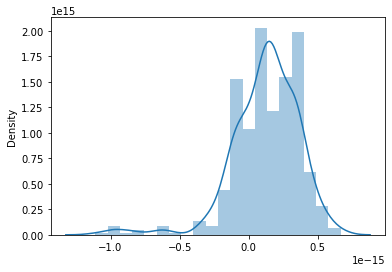

In [99]:
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.show()

#### We have below observations for above chart
1. Error distribution is normal
2. Mean of distribution is not exactly zero.

#### I would like to drop few more variables from model and check the distribution again

In [100]:
#dropping summer with high p value 

X_train_combined_new = X_train_combined.drop(['summer'], axis=1)

X_train_sm = sm.add_constant(X_train_combined_new)

lr_7 = sm.OLS(y_train, X_train_sm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.436e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:30:00   Log-Likelihood:                 17655.
No. Observations:                 510   AIC:                        -3.530e+04
Df Residuals:                     503   BIC:                        -3.527e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.232e-16   3.79e-17      3.247      0.0

In [101]:
#dropping dec with high p value 

X_train_combined_new = X_train_combined_new.drop(['dec'], axis=1)

X_train_sm = sm.add_constant(X_train_combined_new)

lr_8 = sm.OLS(y_train, X_train_sm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.105e+32
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:30:00   Log-Likelihood:                 17677.
No. Observations:                 510   AIC:                        -3.534e+04
Df Residuals:                     504   BIC:                        -3.532e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.556e-16   3.55e-17    -10.018      0.0

In [102]:
#dropping spring with high p value 

X_train_combined_new = X_train_combined.drop(['spring'], axis=1)

X_train_sm = sm.add_constant(X_train_combined_new)

lr_9 = sm.OLS(y_train, X_train_sm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.220e+31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:30:00   Log-Likelihood:                 17532.
No. Observations:                 510   AIC:                        -3.505e+04
Df Residuals:                     503   BIC:                        -3.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         3.4e-16   3.45e-17      9.847      0.0

In [103]:
get_VIF(X_train_combined_new)

     Features   VIF
5  registered  5.64
4          yr  3.19
1      casual  3.15
2      summer  1.38
3         dec  1.10
0     holiday  1.02


#### Let's check the error distribution again based on this model viz. lr_9

In [104]:
X_train_lm = sm.add_constant(X_train_combined_new)

In [105]:
y_train_pred = lr_9.predict(X_train_lm)

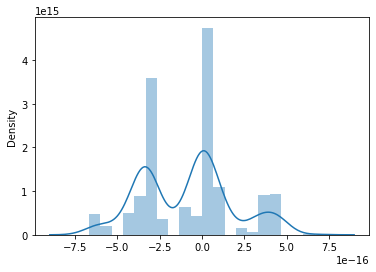

In [106]:
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.show()

####  We have below observations for this model
1. Error distribution is normal
2. Mean of the distribution is zero.

#### I am choosing lr_9 as my final model for test evaluation and prediction.
#### My final list of independent variables is:
1. holiday
2. casual
3. summer
4. dec
5. yr
6. registered

## Making Predictions Using the Final Mode



In [107]:
# Apply scaling on test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [108]:
df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,WCAT2,WCAT3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.570223,0.533045,0.638521,0.313450,0.266372,0.527146,0.520592,0.255708,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.233112,0.217719,0.148978,0.159911,0.217246,0.217921,0.218435,0.437258,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.060606,0.026316,0.261954,-0.042669,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.363636,0.342105,0.527257,0.198588,0.101951,0.359154,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.575758,0.552632,0.627782,0.299647,0.223712,0.526567,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.772727,0.710526,0.743972,0.403272,0.362085,0.664742,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.973684,1.002164,0.807507,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
y_test = df_test['cnt']
X_test = df_test.loc[:,df_test.columns != 'cnt']

In [110]:
X_test.columns 

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'WCAT2', 'WCAT3'],
      dtype='object')

In [111]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [112]:
X_test = X_test.loc[:,['holiday','casual','summer','dec','yr','registered']]

X_test_sm = sm.add_constant(X_test)


In [113]:
y_test_pred = lr_9.predict(X_test_sm)

## Model Evaluation



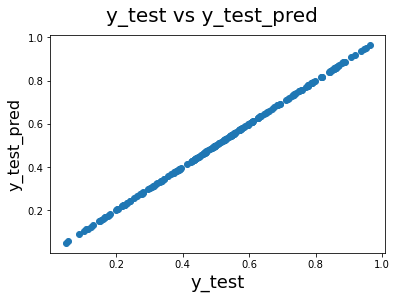

In [114]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  
plt.show()

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

1.0

## We have achieved a perferct r2 score for test data. Looks like out model is behaving very good on the test data.